## 1. Các biến đổi ảnh cơ bản

Nhập phím: I (Inverse), G (Gamma), L (Log), H (Hist Equal), C (Contrast)
Áp dụng: Log Transform


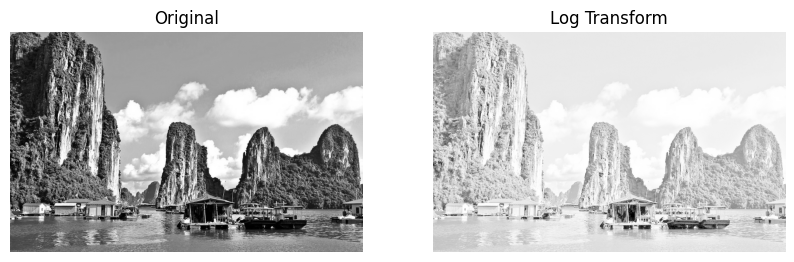

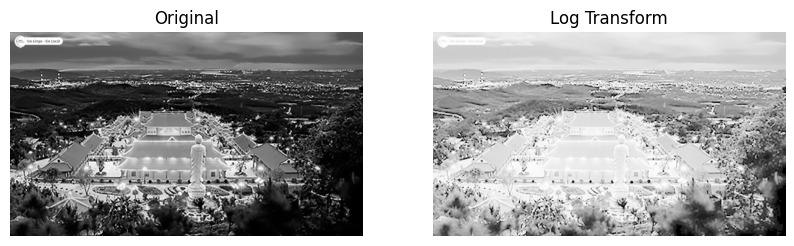

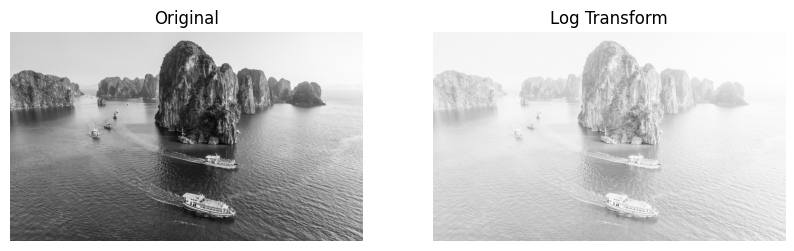

In [ ]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

def inverse_image(img):
    return 255 - img

def gamma_correction(img, gamma=2.2):
    img_normalized = img / 255.0
    corrected = np.power(img_normalized, gamma)
    return np.uint8(corrected * 255)

def log_transform(img):
    img_float = img.astype(float)
    c = 255 / np.log(1 + np.max(img_float))
    log_img = c * np.log(1 + img_float)
    return np.uint8(log_img)

def histogram_equalization(img):
    if len(img.shape) == 2:  # grayscale
        return cv2.equalizeHist(img)
    else:  # color image
        ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
        ycrcb[:, :, 0] = cv2.equalizeHist(ycrcb[:, :, 0])
        return cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2BGR)

def contrast_stretching(img):
    min_val = np.min(img)
    max_val = np.max(img)
    stretched = (img - min_val) * (255.0 / (max_val - min_val))
    return np.uint8(stretched)

transformations = {
    'I': ('Inverse', inverse_image),
    'G': ('Gamma Correction', gamma_correction),
    'L': ('Log Transform', log_transform),
    'H': ('Histogram Equalization', histogram_equalization),
    'C': ('Contrast Stretching', contrast_stretching),
}

folder = 'exercise1'
output_folder = 'output1'
os.makedirs(output_folder, exist_ok=True)

print("Nhập phím: I (Inverse), G (Gamma), L (Log), H (Hist Equal), C (Contrast)")
choice = input("Nhập lựa chọn của bạn: ").upper()

if choice in transformations:
    name, func = transformations[choice]
    print(f"Áp dụng: {name}")

    for filename in os.listdir(folder):
        if filename.lower().endswith(('.jpg', '.png', '.jpeg', '.bmp')):
            path = os.path.join(folder, filename)
            img = cv2.imread(path)

            if choice in ['I', 'G', 'L', 'C']:
                result = func(img)  
                display_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                result_display = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
            elif choice == 'H':
                result = func(img)
                display_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                result_display = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

            output_path = os.path.join(output_folder, f"{choice}_{filename}")
            cv2.imwrite(output_path, result)

            plt.figure(figsize=(10, 4))
            plt.subplot(1, 2, 1)
            plt.title("Original")
            plt.imshow(display_img)
            plt.axis('off')

            plt.subplot(1, 2, 2)
            plt.title(f"{name}")
            plt.imshow(result_display)
            plt.axis('off')
            plt.show()
else:
    print("Phím không hợp lệ!")


## 2. Biến đổi ảnh với Fourier và Butterworth Filter

Nhập phím: F (FFT), L (Lowpass), H (Highpass)
Đang áp dụng: Fast Fourier Transform


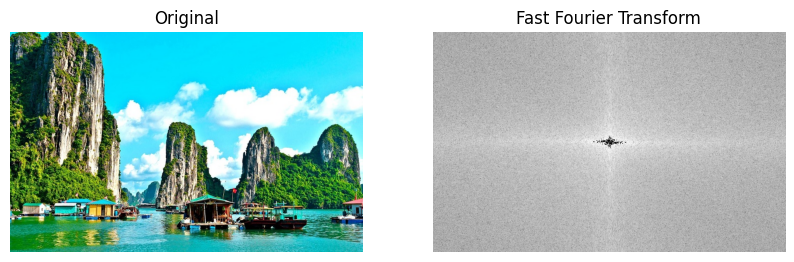

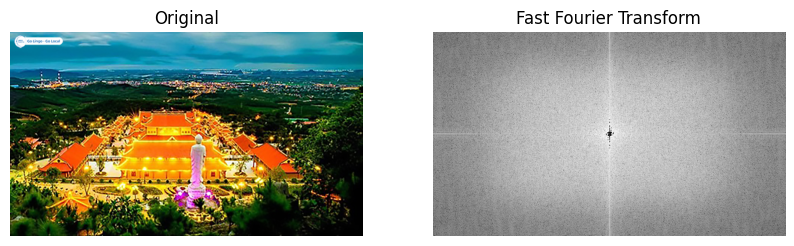

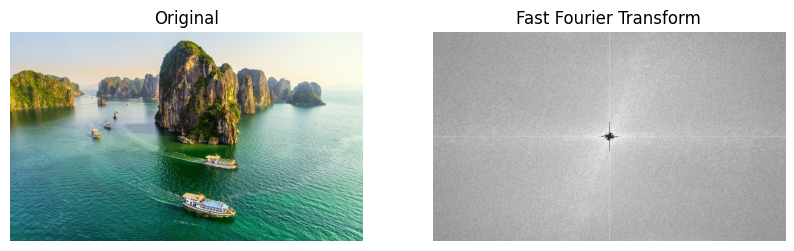

In [19]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

def fft_image(img):
    dft = np.fft.fft2(img)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = 20 * np.log(np.abs(dft_shift) + 1)
    return np.uint8(magnitude_spectrum)

def butterworth_lowpass(img, D0=30, n=2):
    rows, cols = img.shape
    u = np.arange(rows)
    v = np.arange(cols)
    u, v = np.meshgrid(u - rows//2, v - cols//2, indexing='ij')
    D = np.sqrt(u**2 + v**2)
    H = 1 / (1 + (D / D0)**(2*n))
    
    F = np.fft.fft2(img)
    F_shift = np.fft.fftshift(F)
    G = H * F_shift
    G_ishift = np.fft.ifftshift(G)
    img_back = np.fft.ifft2(G_ishift)
    return np.uint8(np.abs(img_back))

def butterworth_highpass(img, D0=30, n=2):
    rows, cols = img.shape
    u = np.arange(rows)
    v = np.arange(cols)
    u, v = np.meshgrid(u - rows//2, v - cols//2, indexing='ij')
    D = np.sqrt(u**2 + v**2)
    H = 1 / (1 + (D0 / D)**(2*n))
    
    F = np.fft.fft2(img)
    F_shift = np.fft.fftshift(F)
    G = H * F_shift
    G_ishift = np.fft.ifftshift(G)
    img_back = np.fft.ifft2(G_ishift)
    return np.uint8(np.abs(img_back))

transformations = {
    'F': ('Fast Fourier Transform', fft_image),
    'L': ('Butterworth Lowpass Filter', butterworth_lowpass),
    'H': ('Butterworth Highpass Filter', butterworth_highpass),
}

folder = 'exercise1'
output_folder = 'output1'
os.makedirs(output_folder, exist_ok=True)

print("Nhập phím: F (FFT), L (Lowpass), H (Highpass)")
choice = input("Nhập lựa chọn của bạn: ").upper()

if choice in transformations:
    name, func = transformations[choice]
    print(f"Đang áp dụng: {name}")

    for filename in os.listdir(folder):
        if filename.lower().endswith(('.jpg', '.png', '.jpeg', '.bmp')):
            path = os.path.join(folder, filename)
            img_color = cv2.imread(path, cv2.IMREAD_COLOR)
            img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

            result = func(img_gray)
            output_path = os.path.join(output_folder, f"{choice}_{filename}")
            cv2.imwrite(output_path, result)

            plt.figure(figsize=(10, 4))
            plt.subplot(1, 2, 1)
            plt.title("Original")
            plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
            plt.axis('off')

            plt.subplot(1, 2, 2)
            plt.title(f"{name}")
            plt.imshow(result, cmap='gray')
            plt.axis('off')
            plt.show()
else:
    print("Phím không hợp lệ!")


## 3. Ngẫu nhiên đảo RGB và chọn phép biến đổi từ câu 1

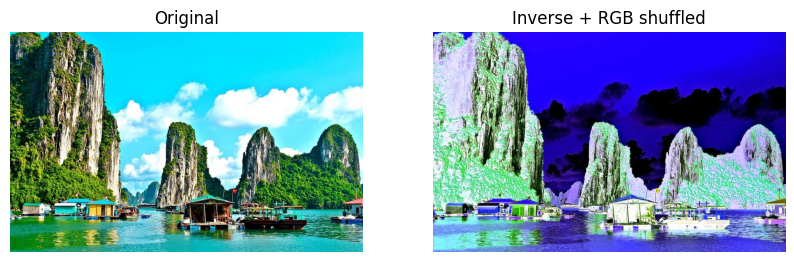

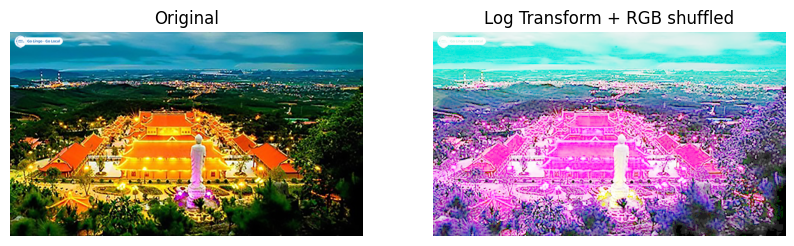

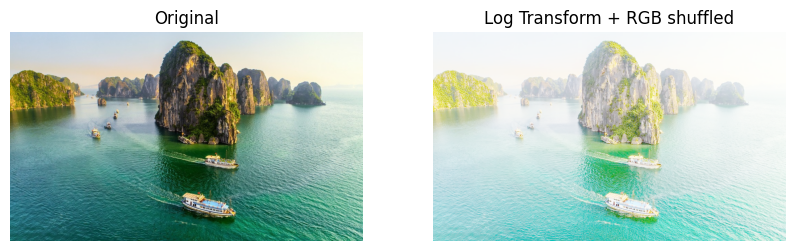

In [21]:
import cv2
import numpy as np
import os
import random
from matplotlib import pyplot as plt

def inverse_image(img):
    return 255 - img

def gamma_correction(img, gamma=2.2):
    img_normalized = img / 255.0
    corrected = np.power(img_normalized, gamma)
    return np.uint8(corrected * 255)

def log_transform(img):
    img_float = img.astype(float)
    c = 255 / np.log(1 + np.max(img_float))
    log_img = c * np.log(1 + img_float)
    return np.uint8(log_img)

def histogram_equalization(img):
    ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    ycrcb[:, :, 0] = cv2.equalizeHist(ycrcb[:, :, 0])
    return cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2BGR)

def contrast_stretching(img):
    img = img.astype(np.float32)
    min_val = np.min(img)
    max_val = np.max(img)
    stretched = (img - min_val) * (255.0 / (max_val - min_val))
    return np.uint8(stretched)

transformations = {
    'I': ('Inverse', inverse_image),
    'G': ('Gamma Correction', gamma_correction),
    'L': ('Log Transform', log_transform),
    'H': ('Histogram Equalization', histogram_equalization),
    'C': ('Contrast Stretching', contrast_stretching),
}

folder = 'exercise1'
output_folder = 'output1'
os.makedirs(output_folder, exist_ok=True)
color_orders = [(0, 1, 2), (0, 2, 1), (1, 0, 2), (1, 2, 0), (2, 0, 1), (2, 1, 0)]
for filename in os.listdir(folder):
    if filename.lower().endswith(('.jpg', '.png', '.jpeg', '.bmp')):
        path = os.path.join(folder, filename)
        img = cv2.imread(path)

        order = random.choice(color_orders)
        shuffled = img[:, :, list(order)]

        key = random.choice(list(transformations.keys()))
        name, func = transformations[key]
        transformed = func(shuffled)

        output_path = os.path.join(output_folder, f"{key}_RGB_{filename}")
        cv2.imwrite(output_path, transformed)
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        plt.title("Original")
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.subplot(1, 2, 2)
        plt.title(f"{name} + RGB shuffled")
        plt.imshow(cv2.cvtColor(transformed, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()




## 4. Ngẫu nhiên đảo RGB và áp dụng phép lọc bổ sung (Min/Max)

In [ ]:
import cv2
import numpy as np
import os
import random
from matplotlib import pyplot as plt

def fft_image(img):
    dft = np.fft.fft2(img)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = 20 * np.log(np.abs(dft_shift) + 1)
    return np.uint8(magnitude_spectrum)

def butterworth_lowpass(img, D0=30, n=2):
    rows, cols = img.shape
    u, v = np.meshgrid(np.arange(cols) - cols//2, np.arange(rows) - rows//2)
    D = np.sqrt(u**2 + v**2)
    H = 1 / (1 + (D / D0)**(2*n))

    F = np.fft.fft2(img)
    F_shift = np.fft.fftshift(F)
    G = H * F_shift
    G_ishift = np.fft.ifftshift(G)
    img_back = np.fft.ifft2(G_ishift)
    return np.uint8(np.abs(img_back))

def butterworth_highpass(img, D0=30, n=2):
    rows, cols = img.shape
    u, v = np.meshgrid(np.arange(cols) - cols//2, np.arange(rows) - rows//2)
    D = np.sqrt(u**2 + v**2)
    H = 1 / (1 + (D0 / D)**(2*n))

    F = np.fft.fft2(img)
    F_shift = np.fft.fftshift(F)
    G = H * F_shift
    G_ishift = np.fft.ifftshift(G)
    img_back = np.fft.ifft2(G_ishift)
    return np.uint8(np.abs(img_back))

def min_filter(img, ksize=3):
    return cv2.erode(img, np.ones((ksize, ksize), np.uint8))

def max_filter(img, ksize=3):
    return cv2.dilate(img, np.ones((ksize, ksize), np.uint8))

transformations = {
    'F': ('FFT', fft_image),
    'L': ('Lowpass', butterworth_lowpass),
    'H': ('Highpass', butterworth_highpass),
}

folder = 'exercise1'
output_folder = 'output1'
os.makedirs(output_folder, exist_ok=True)

color_orders = [(0, 1, 2), (0, 2, 1), (1, 0, 2), (1, 2, 0), (2, 0, 1), (2, 1, 0)]

for filename in os.listdir(folder):
    if filename.lower().endswith(('.jpg', '.png', '.jpeg', '.bmp')):
        path = os.path.join(folder, filename)
        img = cv2.imread(path)

        order = random.choice(color_orders)
        shuffled = img[:, :, list(order)]

        gray = cv2.cvtColor(shuffled, cv2.COLOR_BGR2GRAY)

        key = random.choice(list(transformations.keys()))
        name, func = transformations[key]
        print(f"Đang áp dụng {name} cho {filename}")

        result = func(gray)

        if key == 'L':
            result = min_filter(result)
            name += ' + MinFilter'
        elif key == 'H':
            result = max_filter(result)
            name += ' + MaxFilter'

        output_path = os.path.join(output_folder, f"{key}_RGB_{filename}")
        cv2.imwrite(output_path, result)
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        plt.title("Original")
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.subplot(1, 2, 2)
        plt.title(name)
        plt.imshow(result, cmap='gray')
        plt.axis('off')
        plt.show()
